<a href="https://colab.research.google.com/github/BackBencher2424/BA820_Team_14_Project/blob/main/ba820_m2_q2_drishti_chulani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**BA820 – Project M2**
**Project Title:** *Code Trends, Quantified: Mapping the Programming Language Ecosystem* <br>
***Section:** B1* <br>
***Team:** 14* <br>
***Team Member:** Drishti Chulani <br><br>

***Link to Proposal Notebook (BA820_Team_14_Project_Proposal_Notebook.ipynb):** [Primary Dataset EDA Notebook](https://colab.research.google.com/drive/1irElxdNYp_Hh08p4MeOGdafvt_d1KsT7?usp=sharing)* <br>

***Link to Colab Notebook:** [Research Question 2 Notebook](https://colab.research.google.com/gist/DrishtiChulani/2a94bebfc93ffe65ab51a63abc7ee2c3/ba820_m2_q2_drishti_chulani.ipynb)* <br>

***Dataset:** [Programming Languages Dataset Link](https://github.com/rfordatascience/tidytuesday/tree/main/data/2023/2023-03-21)*<br>

***Link to Github Repo:** [Github Repo Link](https://github.com/BackBencher2424/BA820_Team_14_Project)*


##**1. Setup**

###***Importing Libraries***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
from IPython.display import display

###***Loading Dataset***

In [2]:
path = "/content/languages.csv"
df = pd.read_csv(path) # Loads the primary dataset to the runtime

##**2. Preprocessing**

###***Standerdizing and Exploring the Dataset***

In [3]:
df.columns = [c.strip().lower() for c in df.columns] # Standardizes the columns, strip() —->> removes any trailing or leading spaces, lower() -->> makes all the column names lowercase

In [4]:
print("Shape (rows, cols):", df.shape) #Gives number of Rows and Columns

Shape (rows, cols): (4303, 49)


In [5]:
df.head(10) # Gives the first 10 entries of the dataset

,pldb_id,title,description,type,appeared,creators,website,domain_name,domain_name_registered,reference,...,features_has_semantic_indentation,features_has_line_comments,line_comment_token,last_activity,number_of_users,number_of_jobs,origin_community,central_package_repository_count,file_type,is_open_source
0,java,Java,NaN,pl,1995,James Gosling,https://oracle.com/java/,NaN,NaN,NaN,...,False,True,//,2022,5550123,85206,Sun Microsystems,NaN,text,NaN
1,javascript,JavaScript,NaN,pl,1995,Brendan Eich,NaN,NaN,NaN,https://www.w3schools.com/js/js_reserved.asp,...,False,True,//,2022,5962666,63993,Netscape,NaN,text,NaN
2,c,C,NaN,pl,1972,Dennis Ritchie,NaN,NaN,NaN,http://www.c4learn.com/c-programming/c-keywords/,...,False,True,//,2022,3793768,59919,Bell Labs,0.0,text,NaN
3,python,Python,NaN,pl,1991,Guido van Rossum,https://www.python.org/,python.org,1995.0,https://www.programiz.com/python-programming/k...,...,True,True,#,2022,2818037,46976,Centrum Wiskunde & Informatica,NaN,text,NaN
4,sql,SQL,NaN,queryLanguage,1974,Donald D. Chamberlin and Raymond F. Boyce,NaN,NaN,NaN,NaN,...,False,True,--,2022,7179119,219617,IBM,0.0,text,NaN
5,cpp,C++,NaN,pl,1985,Bjarne Stroustrup,http://isocpp.org/,isocpp.org,2012.0,NaN,...,NaN,NaN,//,2022,4128238,61098,Bell Labs,0.0,text,NaN
6,html,HTML,NaN,textMarkup,1991,Tim Berners-Lee,NaN,NaN,NaN,NaN,...,False,False,NaN,2022,5570873,69531,Conseil Européen pour la Recherche Nucléaire,0.0,text,NaN
7,xml,XML,NaN,dataNotation,1996,NaN,NaN,NaN,NaN,NaN,...,False,False,NaN,2022,1917452,42277,NaN,0.0,text,NaN
8,php,PHP,NaN,pl,1995,Rasmus Lerdorf,https://php.net,php.net,1997.0,http://php.net/manual/en/reserved.keywords.php,...,False,True,//,2022,2356101,30349,Zend,NaN,text,NaN
9,perl,Perl,NaN,pl,1987,Larry Wall,https://www.perl.org,perl.org,1995.0,NaN,...,False,True,#,2022,491984,13482,Unisys,NaN,text,NaN


In [6]:
df.info() # Gives Data types + non-null counts of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4303 entries, 0 to 4302
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   pldb_id                            4303 non-null   object 
 1   title                              4303 non-null   object 
 2   description                        823 non-null    object 
 3   type                               4303 non-null   object 
 4   appeared                           4303 non-null   int64  
 5   creators                           1100 non-null   object 
 6   website                            1375 non-null   object 
 7   domain_name                        715 non-null    object 
 8   domain_name_registered             502 non-null    float64
 9   reference                          1989 non-null   object 
 10  isbndb                             1086 non-null   float64
 11  book_count                         4303 non-null   int64

##**3. Exploratory Data Analysis (EDA)**

###***Calculating Missing & Duplicate Values***


We can't drop any columns based on null values because programming languages have been updated and invented quite a lot and most of them have either some or the other missing information, so we work with the missing values.


In [7]:
# Missing values summary gives columns missing_count and missing_pct

missing = (df.isna().sum()
           .to_frame("missing_count")
           .assign(missing_pct=lambda x: (x["missing_count"] / len(df) * 100).round(2))
           .sort_values("missing_pct", ascending=False))

missing.head(20)  # top 20 columns with most missingness

,missing_count,missing_pct
github_language_ace_mode,3838,89.19
github_language_tm_scope,3837,89.17
github_language_type,3837,89.17
github_language_file_extensions,3833,89.08
github_language_repos,3833,89.08
line_comment_token,3831,89.03
github_language,3829,88.98
domain_name_registered,3801,88.33
is_open_source,3792,88.12
features_has_line_comments,3765,87.50


###***Type Conversion***

In [8]:
df_eda = df.copy()

# Converting year-like columns to numeric (coerce invalid values to NaN)
for col in ["appeared", "wikipedia_appeared", "last_activity", "language_rank"]:
    if col in df_eda.columns:
        df_eda[col] = pd.to_numeric(df_eda[col], errors="coerce")

# Converting GitHub numeric columns
github_num_cols = [
    "github_repo_stars", "github_repo_forks", "github_repo_subscribers",
    "github_repo_issues", "github_language_repos",
    "wikipedia_daily_page_views", "wikipedia_backlinks_count", "wikipedia_revision_count",
    "book_count", "central_package_repository_count",
    "number_of_users", "number_of_jobs"
]
for col in github_num_cols:
    if col in df_eda.columns:
        df_eda[col] = pd.to_numeric(df_eda[col], errors="coerce")

# Parsing date columns
date_cols = ["github_repo_updated", "github_repo_created", "github_repo_first_commit", "wikipedia_created"]
for col in date_cols:
    if col in df_eda.columns:
        df_eda[col] = pd.to_datetime(df_eda[col], errors="coerce")

# Converting obvious boolean-like columns
bool_cols = [c for c in df_eda.columns if c.startswith("features_")] + ["is_open_source"]
for col in bool_cols:
    if col in df_eda.columns:
        # Some columns might be True/False already; others may be NaN
        df_eda[col] = df_eda[col].astype("boolean")

df_eda.dtypes.head(10)

,0
pldb_id,object
title,object
description,object
type,object
appeared,int64
creators,object
website,object
domain_name,object
domain_name_registered,float64
reference,object


###***Numeric Summary Statistics***

In [9]:
# Basic summary statistics for selected numeric columns, because these are most relevant columns
cols_to_summarize = [
    "appeared", "last_activity", "language_rank",
    "github_repo_stars", "github_repo_forks",
    "wikipedia_daily_page_views",
    "number_of_users", "number_of_jobs",
    "central_package_repository_count"
]
cols_to_summarize = [c for c in cols_to_summarize if c in df_eda.columns]

df_eda[cols_to_summarize].describe().T

,count,mean,std,min,25%,50%,75%,max
appeared,4303.0,1991.105275,111.443382,-2000.0,1984.00,1997.0,2012.0,2023.0
last_activity,4303.0,2000.616082,84.597760,-900.0,1992.00,2006.0,2021.0,2023.0
language_rank,4303.0,2151.000000,1242.313433,0.0,1075.50,2151.0,3226.5,4302.0
github_repo_stars,889.0,2127.402700,7554.016422,0.0,29.00,194.0,1071.0,88526.0
github_repo_forks,886.0,261.286682,1203.002760,0.0,2.25,16.0,91.5,23732.0
wikipedia_daily_page_views,1466.0,227.133015,783.552400,-1.0,9.00,24.0,99.0,13394.0
number_of_users,4303.0,13771.264467,227712.946798,0.0,0.00,20.0,230.0,7179119.0
number_of_jobs,4303.0,422.183825,12572.985441,0.0,0.00,0.0,0.0,771996.0
central_package_repository_count,2821.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0


###***Plots***

#### ***Plot 1: GitHub stars (log-scale is helpful because stars are very skewed)***

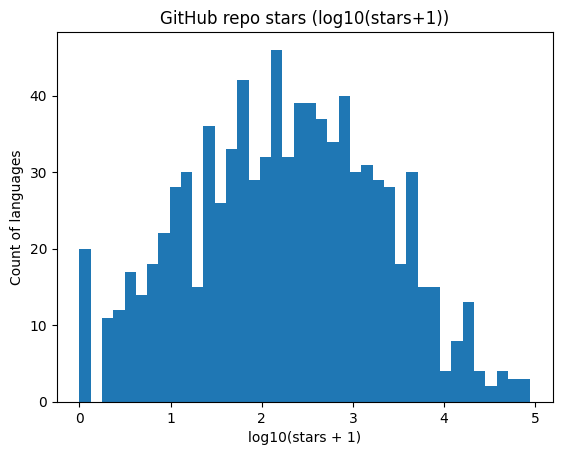

In [10]:
if "github_repo_stars" in df_eda.columns:
    stars = df_eda["github_repo_stars"].dropna()
    plt.figure()
    plt.hist(np.log10(stars + 1), bins=40)
    plt.title("GitHub repo stars (log10(stars+1))")
    plt.xlabel("log10(stars + 1)")
    plt.ylabel("Count of languages")
    plt.show()

####***Plot 2: Wikipedia daily page views (also skewed)***

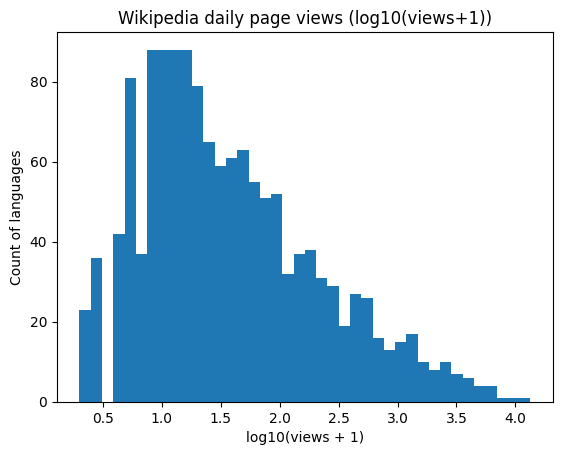

Dropped invalid/NaN views: 2895


In [11]:
if "wikipedia_daily_page_views" in df_eda.columns:
    # 1) Keep only numeric and non-missing
    views = pd.to_numeric(df_eda["wikipedia_daily_page_views"], errors="coerce").dropna()

    # 2) Remove invalid values for log10(x+1): we need x > -1
    views = views[views > -1]

    # 3) Log transform and keep only finite results (removes -inf/+inf)
    log_views = np.log10(views + 1)
    log_views = log_views[np.isfinite(log_views)]

    plt.figure()
    plt.hist(log_views, bins=40)
    plt.title("Wikipedia daily page views (log10(views+1))")
    plt.xlabel("log10(views + 1)")
    plt.ylabel("Count of languages")
    plt.show()

    print("Dropped invalid/NaN views:", len(df_eda) - len(views))


####***Plot 3: Relationship Jobs vs Users***

X-axis (number_of_users) is on the scale 10^6 and hence, There are two outliers HTTP (jobs=771996, users=33780) and SQL (jobs=219617, users=7179119)

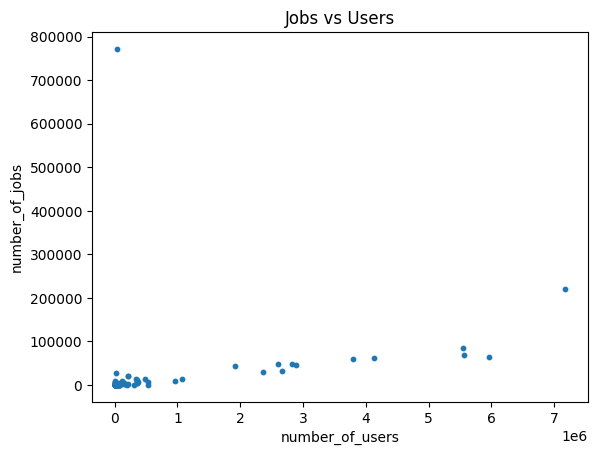

In [12]:
# Scatter: number_of_users vs number_of_jobs
if set(["number_of_users", "number_of_jobs"]).issubset(df_eda.columns):
    tmp = df_eda[["number_of_users", "number_of_jobs"]].dropna()
    plt.figure()
    plt.scatter(tmp["number_of_users"], tmp["number_of_jobs"], s=10)
    plt.title("Jobs vs Users")
    plt.xlabel("number_of_users")
    plt.ylabel("number_of_jobs")
    plt.show()

####***Plot 4: Relationship GitHub stars vs Wikipedia views***

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


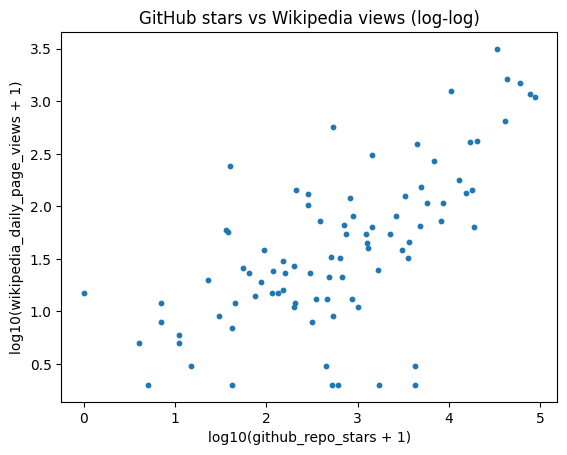

In [13]:
# Scatter (log scale): GitHub stars vs Wikipedia views
if set(["github_repo_stars", "wikipedia_daily_page_views"]).issubset(df_eda.columns):
    tmp = df_eda[["github_repo_stars", "wikipedia_daily_page_views", "title"]].dropna()
    x = np.log10(tmp["github_repo_stars"] + 1)
    y = np.log10(tmp["wikipedia_daily_page_views"] + 1)

    plt.figure()
    plt.scatter(x, y, s=10)
    plt.title("GitHub stars vs Wikipedia views (log-log)")
    plt.xlabel("log10(github_repo_stars + 1)")
    plt.ylabel("log10(wikipedia_daily_page_views + 1)")
    plt.show()

    # Show the top 10 by stars to connect points to real languages
    top10 = tmp.sort_values("github_repo_stars", ascending=False).head(10)[["title", "github_repo_stars", "wikipedia_daily_page_views"]]
    top10

This plot provides the motivation for my question. It indicates that Wikipedia interest and Github engagement are correlated but not identical, which creates gaps in the archetypes.

### ***Correlations***

In [14]:
# Correlation matrix for a small set of numeric columns
num_cols = [
    "github_repo_stars", "github_repo_forks", "github_repo_subscribers",
    "wikipedia_daily_page_views", "wikipedia_backlinks_count",
    "number_of_users", "number_of_jobs"
]
num_cols = [c for c in num_cols if c in df_eda.columns]
corr = df_eda[num_cols].corr(numeric_only=True)
corr

,github_repo_stars,github_repo_forks,github_repo_subscribers,wikipedia_daily_page_views,wikipedia_backlinks_count,number_of_users,number_of_jobs
github_repo_stars,1.000000,0.842264,0.892564,0.589823,0.283119,0.375530,0.293965
github_repo_forks,0.842264,1.000000,0.928575,0.494591,0.321279,0.439711,0.406260
github_repo_subscribers,0.892564,0.928575,1.000000,0.644099,0.370503,0.474368,0.428320
wikipedia_daily_page_views,0.589823,0.494591,0.644099,1.000000,0.413366,0.452743,0.341945
wikipedia_backlinks_count,0.283119,0.321279,0.370503,0.413366,1.000000,0.430943,0.147779
number_of_users,0.375530,0.439711,0.474368,0.452743,0.430943,1.000000,0.324028
number_of_jobs,0.293965,0.406260,0.428320,0.341945,0.147779,0.324028,1.000000


This shows the foundation between the features that are necessary for the analysis of my question and why they work together.

###***Few More Key Findings (includes new tables and plots)***

####***What are the top 10 programming languages that have the most number of jobs?***

In [15]:
# Top 10 Languages by Jobs
print("Top 10 by Jobs:\n", df_eda[['title', 'number_of_jobs']].nlargest(10, 'number_of_jobs'))

Top 10 by Jobs:
          title  number_of_jobs
38        HTTP          771996
4          SQL          219617
0         Java           85206
6         HTML           69531
1   JavaScript           63993
5          C++           61098
2            C           59919
13       MySQL           47466
3       Python           46976
15         CSS           45617


####***What are the top 10 programming languages that have the most number of users?***

In [16]:
# Top 10 by Users
print("\nTop 10 by Users:\n", df_eda[['title', 'number_of_users']].nlargest(10, 'number_of_users'))


Top 10 by Users:
          title  number_of_users
4          SQL          7179119
1   JavaScript          5962666
6         HTML          5570873
0         Java          5550123
5          C++          4128238
2            C          3793768
15         CSS          2881846
3       Python          2818037
10      MATLAB          2661579
13       MySQL          2608362


Have used these 2 tables as evidence for our clusters

##**Question 2: Market Archetypes**

Can we segment programming languages into distinct "Market Archetypes": specifically "Hype Driven" (high GitHub stars, low job counts) vs. "Silent Giants" (low social hype, high job counts and user estimates)

In [17]:
features=['github_repo_stars','number_of_jobs','number_of_users','wikipedia_daily_page_views']

In [18]:
#cleaning the data by making the negative values as 0 and handling the missing values

for feature in features:
    df_eda[feature] = pd.to_numeric(df_eda[feature], errors='coerce')
df_subset = df_eda[features].fillna(0)

# Ensure no negative values remain in df_subset before log transformation.
# The 'wikipedia_daily_page_views' column has a minimum value of -1.0 in the original data,
# which would lead to log10(0) and thus -inf after adding 1.
df_log = np.log10(df_subset.clip(lower=0) + 1)

#standardizing for Cluster
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_log)

### Elbow Method

The plot of Inertia shows a sharp decrease as k increases, with a very clear point at 4.

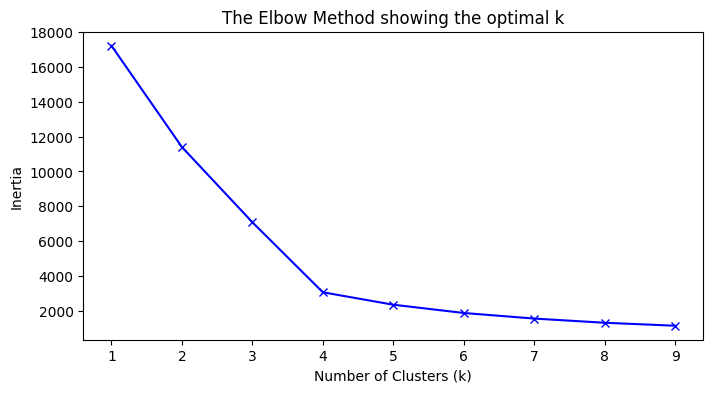

In [19]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1, 10)
for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(df_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Silhouette Score

This validation indicates that the score peaks significantly at k=4

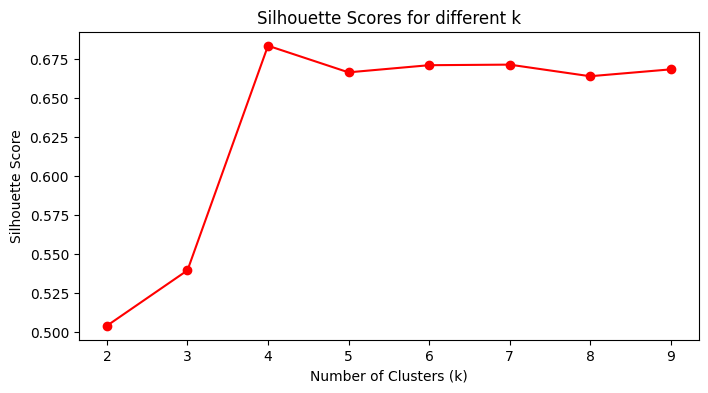

In [20]:
from sklearn.metrics import silhouette_score

sil_scores = []
K = range(2, 10) # Silhouette needs at least 2 clusters
for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(df_scaled)
    sil_scores.append(silhouette_score(df_scaled, labels))

plt.figure(figsize=(8, 4))
plt.plot(K, sil_scores, 'ro-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for different k')
plt.show()

These two plots showcases that k=4 produces the best results without diminishing returns within cluster variance.

## using K-Means with k=4

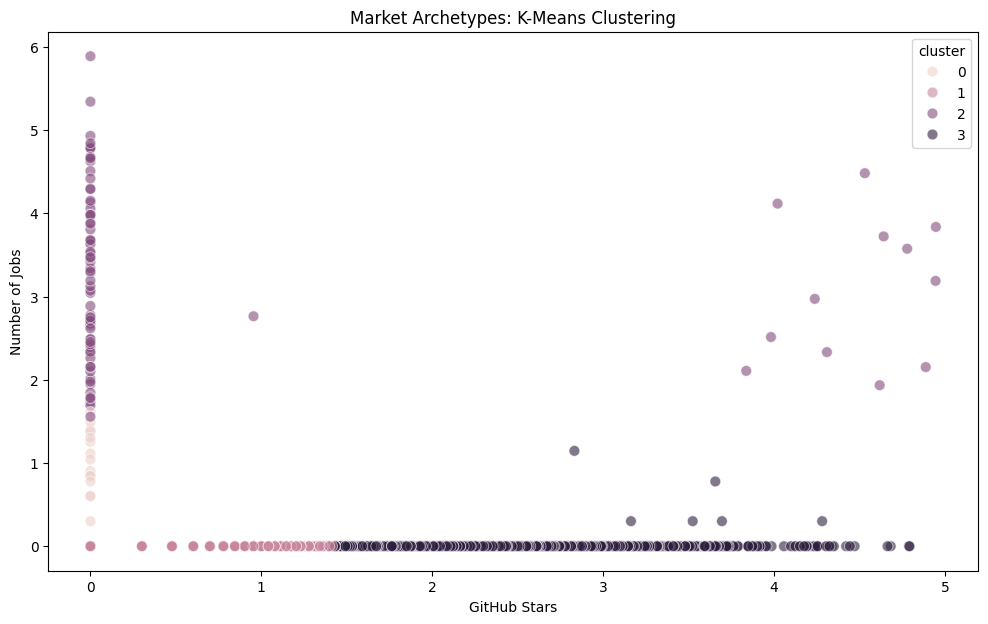

Cluster Profiles (Mean values):
         github_repo_stars  number_of_jobs  number_of_users  \
cluster                                                       
0                17.384615        0.174134      1091.344886   
1                 8.585106        0.000000         8.447313   
2             38310.615385    22151.573171    683414.829268   
3              2061.308148        0.032593      2824.760000   

         wikipedia_daily_page_views  
cluster                              
0                        160.704429  
1                          1.048951  
2                       1750.775000  
3                         59.391304  

Representative Examples for Cluster 0:
         pldb_id        title description             type  appeared  \
96          rexx         Rexx         NaN               pl      1979   
100        antlr        ANTLR         NaN  grammarLanguage      1992   
73   common-lisp  Common Lisp         NaN               pl      1984   
124       llvmir      LLVM IR    

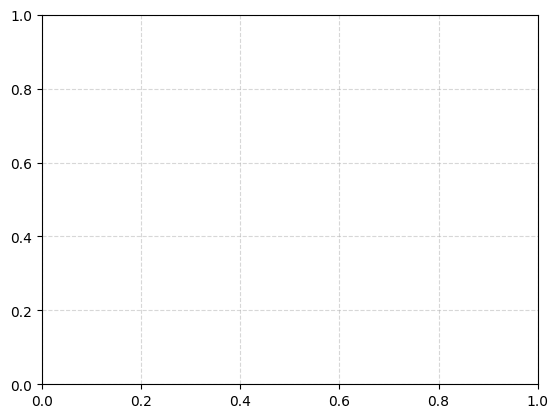

In [21]:
#K-Means Clustering
from sklearn.cluster import KMeans

#using k=4
kmeans=KMeans(n_clusters=4,random_state=42,n_init=10)
df_eda['cluster']=kmeans.fit_predict(df_scaled)

# Visualize the archetypes
plt.figure(figsize=(12,7))
scatter=sns.scatterplot(
    x=df_log['github_repo_stars'],
    y=df_log['number_of_jobs'],
    hue = df_eda['cluster'],
    alpha=0.6,
    s=60)

plt.title('Market Archetypes: K-Means Clustering')
plt.xlabel('GitHub Stars')
plt.ylabel('Number of Jobs')
plt.show()
plt.grid(True, linestyle="--", alpha=0.5)

#For Clustering
print("Cluster Profiles (Mean values):")
# Select only the numeric columns relevant for profiling before calculating the mean
# Using the 'features' list defined earlier, which contains the numeric columns for clustering
print(df_eda.groupby('cluster')[features].mean())

#identify representative examples for each cluster
for i in range(4):
    print(f"\nRepresentative Examples for Cluster {i}:")
    print(df_eda[df_eda['cluster'] == i].sort_values(by='number_of_jobs', ascending=False).head(4))

Using Mathematical support like Elbow Method and Silhouette Score, indicates that k=4 as best point and number of clusters.
It helps isolate the 4 unique market behaviours: Titans or Industry Standard (High All), Hype-Driven (High Stars/Low Jobs)

## using K-Means with k=3

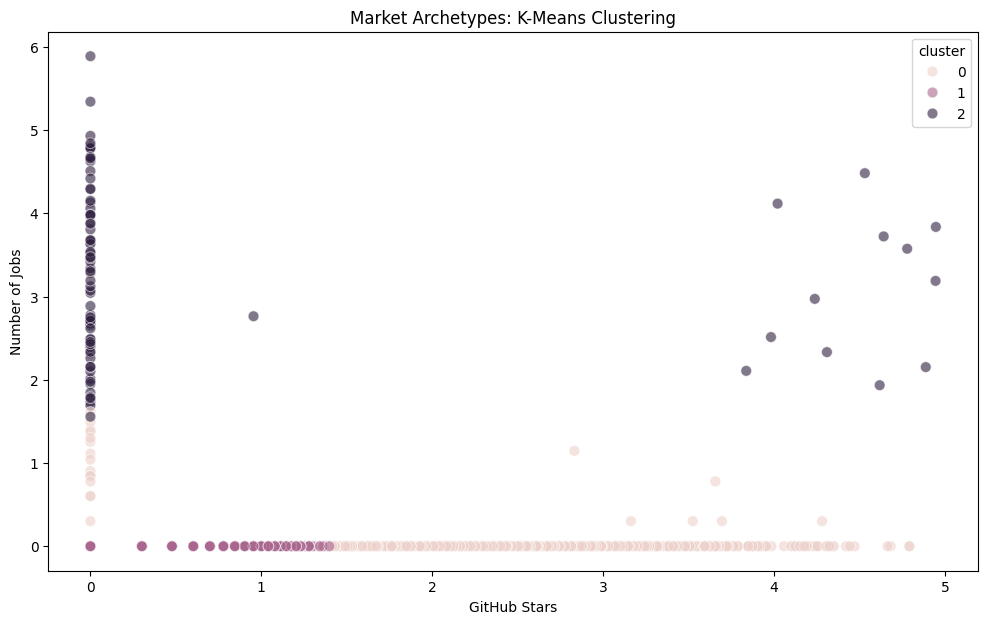

Cluster Profiles (Mean values):
         github_repo_stars  number_of_jobs  number_of_users  \
cluster                                                       
0              1985.517832        0.123913      1737.690761   
1                 7.857143        0.000000         8.561109   
2             38310.615385    22151.573171    683414.829268   

         wikipedia_daily_page_views  
cluster                              
0                        158.942244  
1                          1.591954  
2                       1750.775000  

Representative Examples for Cluster 0:
         pldb_id        title description             type  appeared  \
96          rexx         Rexx         NaN               pl      1979   
100        antlr        ANTLR         NaN  grammarLanguage      1992   
73   common-lisp  Common Lisp         NaN               pl      1984   
124       llvmir      LLVM IR         NaN               ir      2003   

                                              creators  \
96 

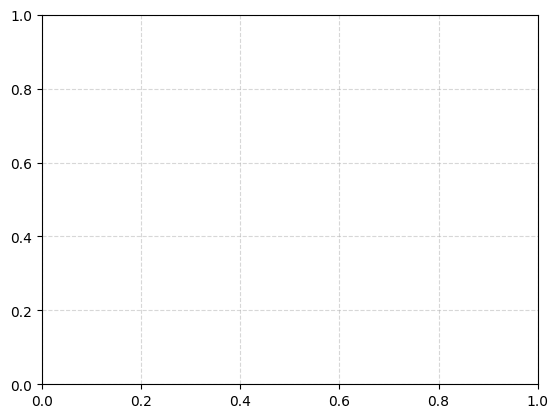

In [22]:
#K-Means Clustering
from sklearn.cluster import KMeans

#using k=3
kmeans1=KMeans(n_clusters=3,random_state=42,n_init=10)
df_eda['cluster']=kmeans1.fit_predict(df_scaled)

# Visualize the archetypes
plt.figure(figsize=(12,7))
scatter=sns.scatterplot(
    x=df_log['github_repo_stars'],
    y=df_log['number_of_jobs'],
    hue = df_eda['cluster'],
    alpha=0.6,
    s=60)

plt.title('Market Archetypes: K-Means Clustering')
plt.xlabel('GitHub Stars')
plt.ylabel('Number of Jobs')
plt.show()
plt.grid(True, linestyle="--", alpha=0.5)

#For Clustering
print("Cluster Profiles (Mean values):")
# Select only the numeric columns relevant for profiling before calculating the mean
# Using the 'features' list defined earlier, which contains the numeric columns for clustering
print(df_eda.groupby('cluster')[features].mean())

#identify representative examples for each cluster
for i in range(4):
    print(f"\nRepresentative Examples for Cluster {i}:")
    print(df_eda[df_eda['cluster'] == i].sort_values(by='number_of_jobs', ascending=False).head(4))

K=3 is not good as it merged "Hyped" Langauges with older historical languages, causing Underfitting.

With only three groups, the "center" of the clusters gets automatically pulled toward the massive number of languages with zero activity, making the resulting categories less representative of actual market behavior.